## Problem Statement:
Create a predictive model which can identify if a person will develop Heart disease or not? Based on the current lifestyle habits and health

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables 
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

#### Demographic:
* Sex: male or female(Nominal)
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
#### Behavioral
* Current Smoker: whether or not the patient is a current smoker (Nominal)
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
#### Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
#### Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

#### Target variable (TenYearCHD)
* 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

## Reading the data

In [54]:
import pandas as pd
import numpy as np

HeartDiseaseData=pd.read_csv('HeartDiseaseData.csv')
HeartDiseaseData.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [55]:
# Looking at the number of rows and columns
HeartDiseaseData.shape

(4238, 16)

## Removing duplicate rows

In [56]:
# Removing duplicate rows from data
HeartDiseaseData=HeartDiseaseData.drop_duplicates()
HeartDiseaseData.shape

(4238, 16)

## Understanding data types

In [57]:
# Observing the summarized information of data
# Data types, Missing values etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
HeartDiseaseData.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

* Continuous columns: age, cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, glucose
* Nominal Categorical: male, currentSmoker, BPMeds,prevalentStroke, prevalentHyp, diabetes
* Nominal Ordinal : education

## Looking at data distribution

In [58]:
HeartDiseaseData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4238 entries, 0 to 4237
Data columns (total 16 columns):
male               4238 non-null int64
age                4238 non-null int64
education          4133 non-null float64
currentSmoker      4238 non-null int64
cigsPerDay         4209 non-null float64
BPMeds             4185 non-null float64
prevalentStroke    4238 non-null int64
prevalentHyp       4238 non-null int64
diabetes           4238 non-null int64
totChol            4188 non-null float64
sysBP              4238 non-null float64
diaBP              4238 non-null float64
BMI                4219 non-null float64
heartRate          4237 non-null float64
glucose            3850 non-null float64
TenYearCHD         4238 non-null int64
dtypes: float64(9), int64(7)
memory usage: 562.9 KB


In [59]:
HeartDiseaseData.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Visualizing data distribution for continuous columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cc25c10>,
      dtype=object)

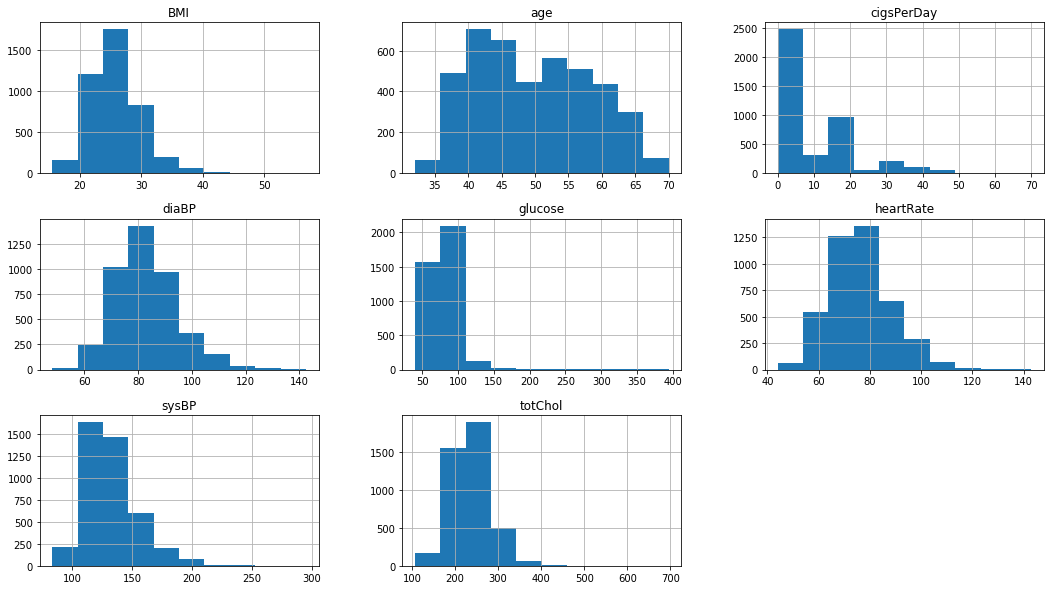

In [60]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
%matplotlib inline
HeartDiseaseData.hist(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 
                       'glucose'], figsize=(18,10))

## Visualizing data distribution for categorical columns

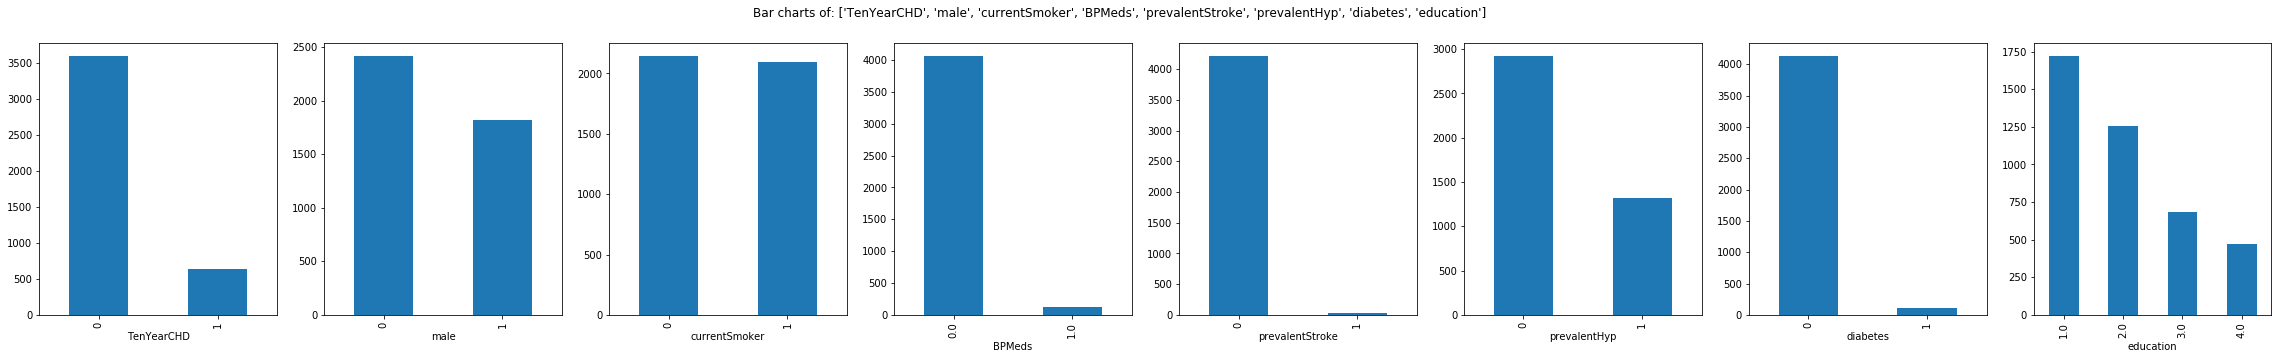

In [61]:
# Plotting multiple bar charts for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

#######################
# Calling the function
PlotBarCharts(inpData=HeartDiseaseData, colsToPlot=['TenYearCHD','male', 'currentSmoker', 'BPMeds','prevalentStroke', 
                                                    'prevalentHyp', 'diabetes','education'])

## Treating missing values

In [62]:
# Finding missing values
HeartDiseaseData.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [63]:
# Replacing missing values using interpolation
# Students can also choose filling with mode or median values

# replacing missing values for the categorical variable
HeartDiseaseData['education'].interpolate(method='ffill', inplace=True)

# replacing missing values for the continuous variable
HeartDiseaseData['cigsPerDay'].interpolate(method='linear', inplace=True)
HeartDiseaseData['BPMeds'].interpolate(method='linear', inplace=True)
HeartDiseaseData['totChol'].interpolate(method='linear', inplace=True)
HeartDiseaseData['heartRate'].interpolate(method='linear', inplace=True)
HeartDiseaseData['BMI'].interpolate(method='linear', inplace=True)
HeartDiseaseData['glucose'].interpolate(method='linear', inplace=True)

In [64]:
# Finding missing values again after treatment
HeartDiseaseData.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Feature selection: Categorical Vs Continuous

In [67]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [68]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
FunctionAnova(inpData=HeartDiseaseData, TargetVariable='TenYearCHD', ContinuousPredictorList=ContinuousVariables)


##### ANOVA Results ##### 

age is correlated with TenYearCHD | P-Value: 6.8450085874350565e-50
cigsPerDay is correlated with TenYearCHD | P-Value: 0.0001636189113788803
totChol is correlated with TenYearCHD | P-Value: 7.339424926398611e-08
sysBP is correlated with TenYearCHD | P-Value: 4.195339891486877e-46
diaBP is correlated with TenYearCHD | P-Value: 1.9688347291862935e-21
BMI is correlated with TenYearCHD | P-Value: 1.5792185272825831e-06
heartRate is NOT correlated with TenYearCHD | P-Value: 0.13602773369328997
glucose is correlated with TenYearCHD | P-Value: 1.2632237515403615e-14


['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

In [69]:
## Final selected continuous variables
# 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose'

## Feature selection: Categorical vs Categorical

In [70]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [72]:
# Calling the function
CategoricalVariables=['male', 'currentSmoker', 'BPMeds','prevalentStroke', 
                    'prevalentHyp', 'diabetes','education']
FunctionChisq(inpData=HeartDiseaseData, TargetVariable='TenYearCHD',CategoricalVariablesList= CategoricalVariables)


male is correlated with TenYearCHD | P-Value: 1.1073976912877559e-08
currentSmoker is NOT correlated with TenYearCHD | P-Value: 0.22102472245944974
BPMeds is correlated with TenYearCHD | P-Value: 1.0442721468926774e-07
prevalentStroke is correlated with TenYearCHD | P-Value: 0.00018080313034275284
prevalentHyp is correlated with TenYearCHD | P-Value: 1.0998229381834027e-30
diabetes is correlated with TenYearCHD | P-Value: 5.641334407100521e-10
education is correlated with TenYearCHD | P-Value: 3.448453499959684e-06


['male', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'education']

In [73]:
# Final selected categorical variables
# ['male', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'education']

## Machine Learning: Splitting data into training and testing

In [76]:
# Separate Target Variable and Predictor Variables
TargetVariable='TenYearCHD'
Predictors=['male', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'education',
           'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

X=HeartDiseaseData[Predictors].values
y=HeartDiseaseData[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2966, 13)
(2966,)
(1272, 13)
(1272,)


## Logistic Regression

In [77]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
#choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1084
           1       0.74      0.11      0.19       188

    accuracy                           0.86      1272
   macro avg       0.80      0.55      0.56      1272
weighted avg       0.85      0.86      0.82      1272

[[1077    7]
 [ 168   20]]
Accuracy of the model: 0.82


,male,BPMeds,prevalentStroke,prevalentHyp,diabetes,education,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD,PredictedTenYearCHD
0,1.0,0.0,0.0,1.0,0.0,1.0,63.0,0.0,190.0,148.0,90.0,27.13,86.0,0,0
1,1.0,0.0,0.0,0.0,0.0,3.0,45.0,0.0,162.0,125.0,89.0,27.98,83.0,0,0
2,0.0,0.0,0.0,0.0,0.0,1.0,51.0,2.0,261.0,127.0,81.0,20.24,96.0,0,0
3,1.0,0.0,0.0,0.0,0.0,3.0,45.0,30.0,250.0,126.0,89.5,28.68,92.0,0,0
4,0.0,0.0,0.0,0.0,0.0,2.0,45.0,3.0,250.0,130.0,80.0,20.24,86.0,0,0


## Decision Tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1084
           1       0.23      0.28      0.25       188

    accuracy                           0.76      1272
   macro avg       0.55      0.56      0.55      1272
weighted avg       0.78      0.76      0.76      1272

[[909 175]
 [136  52]]
Accuracy of the model: 0.76


,male,BPMeds,prevalentStroke,prevalentHyp,diabetes,education,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD,PredictedTenYearCHD
0,1.0,0.0,0.0,1.0,0.0,1.0,63.0,0.0,190.0,148.0,90.0,27.13,86.0,0,1
1,1.0,0.0,0.0,0.0,0.0,3.0,45.0,0.0,162.0,125.0,89.0,27.98,83.0,0,1
2,0.0,0.0,0.0,0.0,0.0,1.0,51.0,2.0,261.0,127.0,81.0,20.24,96.0,0,0
3,1.0,0.0,0.0,0.0,0.0,3.0,45.0,30.0,250.0,126.0,89.5,28.68,92.0,0,0
4,0.0,0.0,0.0,0.0,0.0,2.0,45.0,3.0,250.0,130.0,80.0,20.24,86.0,0,0


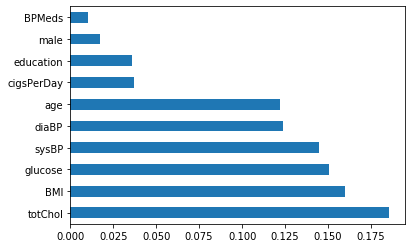

In [81]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=30,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

## Random forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1084
           1       0.68      0.08      0.14       188

    accuracy                           0.86      1272
   macro avg       0.77      0.54      0.53      1272
weighted avg       0.84      0.86      0.81      1272

[[1077    7]
 [ 173   15]]
Accuracy of the model: 0.81


,male,BPMeds,prevalentStroke,prevalentHyp,diabetes,education,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD,PredictedTenYearCHD
0,1.0,0.0,0.0,1.0,0.0,1.0,63.0,0.0,190.0,148.0,90.0,27.13,86.0,0,0
1,1.0,0.0,0.0,0.0,0.0,3.0,45.0,0.0,162.0,125.0,89.0,27.98,83.0,0,0
2,0.0,0.0,0.0,0.0,0.0,1.0,51.0,2.0,261.0,127.0,81.0,20.24,96.0,0,0
3,1.0,0.0,0.0,0.0,0.0,3.0,45.0,30.0,250.0,126.0,89.5,28.68,92.0,0,0
4,0.0,0.0,0.0,0.0,0.0,2.0,45.0,3.0,250.0,130.0,80.0,20.24,86.0,0,0


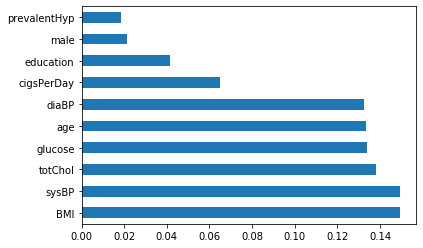

In [89]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=40, n_estimators=1000,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

## Adaboost

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

,male,BPMeds,prevalentStroke,prevalentHyp,diabetes,education,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD,PredictedTenYearCHD
0,1.0,0.0,0.0,1.0,0.0,1.0,63.0,0.0,190.0,148.0,90.0,27.13,86.0,0,0
1,1.0,0.0,0.0,0.0,0.0,3.0,45.0,0.0,162.0,125.0,89.0,27.98,83.0,0,0
2,0.0,0.0,0.0,0.0,0.0,1.0,51.0,2.0,261.0,127.0,81.0,20.24,96.0,0,0
3,1.0,0.0,0.0,0.0,0.0,3.0,45.0,30.0,250.0,126.0,89.5,28.68,92.0,0,0
4,0.0,0.0,0.0,0.0,0.0,2.0,45.0,3.0,250.0,130.0,80.0,20.24,86.0,0,0


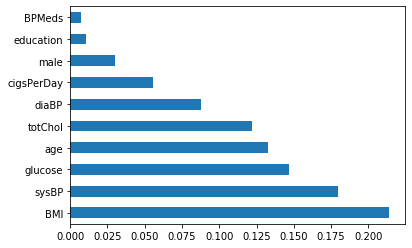

In [92]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 2 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=2)
clf = AdaBoostClassifier(n_estimators=2000, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

## XGboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
              max_depth=20, min_child_weight=1, missing=None, n_estimators=1000,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1084
           1       0.39      0.12      0.18       188

    accuracy                           0.84      1272
   macro avg       0.62      0.54      0.55      1272
weighted avg       0.79      0.84      0.80      1272

[[1049   35]
 [ 166   22]]
Accuracy of the model: 0.8


,male,BPMeds,prevalentStroke,prevalentHyp,diabetes,education,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD,PredictedTenYearCHD
0,1.0,0.0,0.0,1.0,0.0,1.0,63.0,0.0,190.0,148.0,90.0,27.13,86.0,0,1
1,1.0,0.0,0.0,0.0,0.0,3.0,45.0,0.0,162.0,125.0,89.0,27.98,83.0,0,0
2,0.0,0.0,0.0,0.0,0.0,1.0,51.0,2.0,261.0,127.0,81.0,20.24,96.0,0,0
3,1.0,0.0,0.0,0.0,0.0,3.0,45.0,30.0,250.0,126.0,89.5,28.68,92.0,0,0
4,0.0,0.0,0.0,0.0,0.0,2.0,45.0,3.0,250.0,130.0,80.0,20.24,86.0,0,0


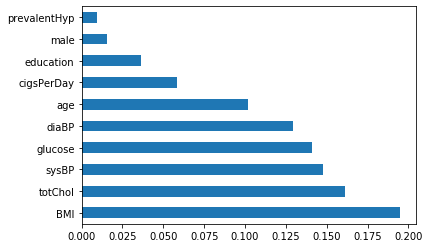

In [94]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=20, learning_rate=0.01, n_estimators=1000, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

## Performing K-fold cross validation for the best model

In [99]:
# Each student can have a different model as the best one, based on the tuning
# Scoring must be done based on whether they perform this step or not

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

In [100]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print(Accuracy_Values)
print('Final Average Accuracy of the model:', Accuracy_Values.mean())

[0.75020918 0.77882353 0.75840354 0.77247712 0.77141448 0.74613611
 0.75472832 0.74978951 0.77643341 0.75472832]
Final Average Accuracy of the model: 0.7613143523588592
